In [1]:
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=read_csv('BostonHousing.csv')

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

In [5]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [6]:
#Descriptions
set_option('precision',1)
print(data.describe())

          crim     zn  indus     chas    nox     rm    age    dis    rad  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         tax  ptratio      b  lstat   medv  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


In [7]:
#correlation
set_option('precision',2)
print(data.corr(method='pearson'))

         crim    zn  indus      chas   nox    rm   age   dis       rad   tax  \
crim     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
zn      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
indus    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
chas    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
nox      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
rm      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
age      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
dis     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
rad      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
tax      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
ptratio  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
b       -0.39  0.18  -0.36  4.88e-02 -0.

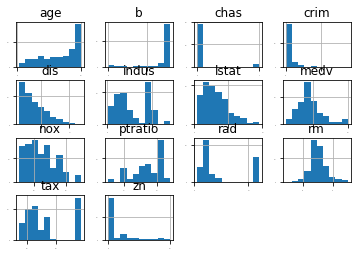

In [8]:
#Histograms
data.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)
pyplot.show()

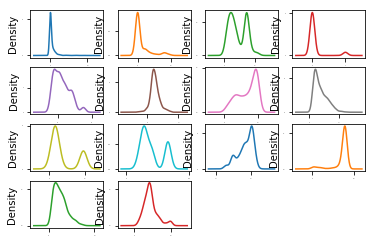

In [9]:
#density
data.plot(kind='density',subplots=True,layout=(4,4),sharex=False,legend=False,fontsize=1)
pyplot.show()

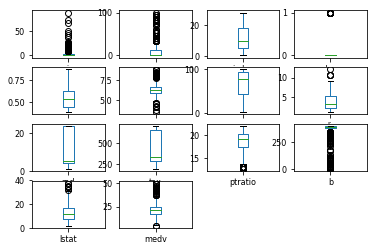

In [10]:
#Box and Whisker Plots
data.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,legend=False,fontsize=8)
pyplot.show()

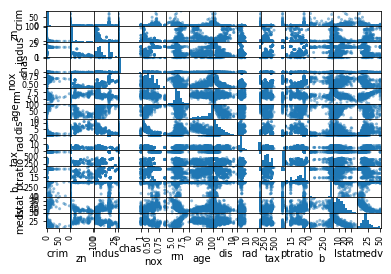

In [11]:
#Scatter plot matrix
scatter_matrix(data)
pyplot.show()

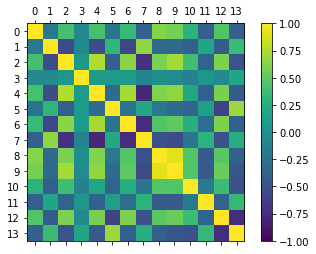

In [12]:
#correaltion Matrix
fig=pyplot.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(data.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
ticks=numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(data.names)
#ax.set_yticklabels(data.names)
pyplot.show()

In [13]:
#split-out validation dataset
array=data.values
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [14]:
#Spot-Check Alogarithms
models=[]
models.append(('LR',LinearRegression()))
models.append(('Lasso',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

In [15]:
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f(%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

LR: -21.379856(9.414264)
Lasso: -26.423561(11.651110)
EN: -27.502259(12.305022)
KNN: -41.896488(13.901688)
CART: -23.079998(10.796607)
SVR: -85.518342(31.994798)


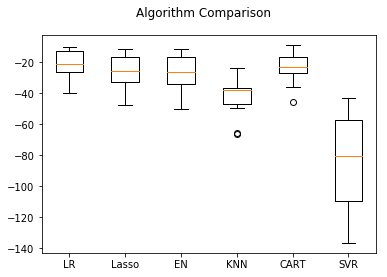

In [18]:
# Compare Algorithms
fig=pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()